# Character Recognition

The project introduction here...

### Requirements - 

** Manual Installation **
    1. Python 3 - 32/64 bit
    2. numpy (pip install numpy)
    3. matplotlib (pip install matplotlib)
    4. pillow (pip install pillow)
    
** Anaconda Environment **
    1. Anaconda Version 5.x
    2. numpy (pip install numpy)
    3. matplotlib (pip install matplotlib)
    4. pillow (pip install pillow)
    
** Dataset **
    1. Sentdex Tutorial Images - for numbers (http://sentdex.com/tutorialimages.zip)

In [50]:
# Importing the required modules for the project

import numpy as np # For array manipulation of the images
import matplotlib.pyplot as plt # To plot the graph for presentation and analysis
from PIL import Image # To open and read images
from statistics import mean # To find mean of the array
from collections import Counter # To track the similar match matrix from dataset
import os # To manipulate files

In [4]:
image = Image.open('images/dot.png')

In [5]:
# convert the image into a numpy array
image_array = np.asarray(image) # this would be a 3D array
# First Dimension for the pixel array
# Second Dimension for the pixel row
# Third Dimension for the pixel columns
# Our images are saved as 256 color bit map
print(image_array)

[[[  0   0   0 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 2

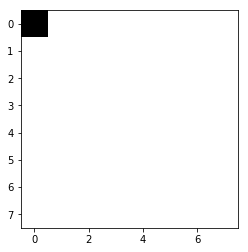

In [6]:
# Plotting the images
plt.imshow(image_array)
plt.show()

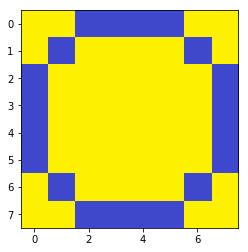

In [7]:
# Plotting an RGB image
image = Image.open('images/numbers/y0.4.png')
image_array = np.asarray(image)
plt.imshow(image_array)
plt.show()

### The Challenge
Our analysis model would be based for grayscale images. We need to convert our different coloured RGB images into grayscale images. 

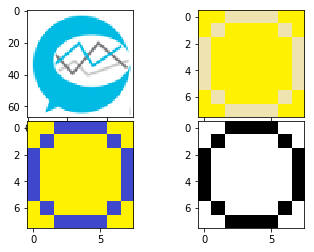

In [8]:
image_1 = Image.open('images/sentdex.png')
image_array_1 = np.asarray(image_1)

image_2 = Image.open('images/numbers/y0.4.png')
image_array_2 = np.asarray(image_2)

image_3 = Image.open('images/numbers/y0.5.png')
image_array_3 = np.asarray(image_3)

image_4 = Image.open('images/numbers/0.1.png')
image_array_4 = np.asarray(image_4)

fig = plt.figure()
ax1 = plt.subplot2grid((8, 8), (0, 0), rowspan = 4, colspan = 4)
ax2 = plt.subplot2grid((8, 8), (4, 0), rowspan = 4, colspan = 4)
ax3 = plt.subplot2grid((8, 8), (0, 4), rowspan = 4, colspan = 4)
ax4 = plt.subplot2grid((8, 8), (4, 4), rowspan = 4, colspan = 4)

ax1.imshow(image_array_1)
ax2.imshow(image_array_2)
ax3.imshow(image_array_3)
ax4.imshow(image_array_4)

plt.show()

### Thresholding
* For different coloured images like the one above we use thresholding to convert image into pure black and white
* If the RGB value of a pixel is above certain threshold value it is white else black.

In [12]:
def threshold(image_array):
    balance_array = []
    new_array = image_array.copy()
    
    for each_row in image_array:
        for each_pix in each_row:
            average_num = mean(each_pix[:3])
            balance_array.append(average_num)
            
    balance_num = mean(balance_array)
    
    for each_row in new_array:
        for each_pix in each_row:
            pass
            
            if mean(each_pix[:3]) > balance_num:
                each_pix[0] = 255
                each_pix[1] = 255
                each_pix[2] = 255
                each_pix[3] = 255
            else:
                each_pix[0] = 0
                each_pix[1] = 0
                each_pix[2] = 0
                each_pix[3] = 255
            
                
    return new_array

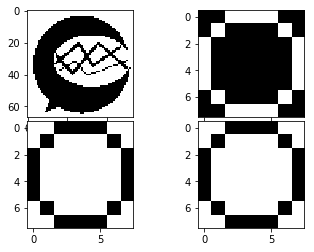

In [13]:
fig = plt.figure()
ax1 = plt.subplot2grid((8, 8), (0, 0), rowspan = 4, colspan = 4)
ax2 = plt.subplot2grid((8, 8), (4, 0), rowspan = 4, colspan = 4)
ax3 = plt.subplot2grid((8, 8), (0, 4), rowspan = 4, colspan = 4)
ax4 = plt.subplot2grid((8, 8), (4, 4), rowspan = 4, colspan = 4)

ax1.imshow(threshold(image_array_1))
ax2.imshow(threshold(image_array_2))
ax3.imshow(threshold(image_array_3))
ax4.imshow(threshold(image_array_4))

plt.show()

In [37]:
# Function to generate the training dataset from the number images
def createNumberExamples():
    file_name = 'examples/number_array_examples.txt'
    
    # Remove the already existing file
    if os.path.exists(file_name):
        os.remove(file_name)
    
    number_array_examples = open(file_name, 'a')
    all_numbers = range(0, 10)
    all_versions = range(1, 10)
    
    for each_num in all_numbers:
        for each_version in all_versions:
            # print(str(each_num) + '.' + str(each_version))
            image_file_path = 'images/numbers/' + str(each_num) + '.' + str(each_version) + '.png'
            example_image = Image.open(image_file_path)
            example_image_array = np.asarray(example_image)
            example_image_array_list = str(example_image_array.tolist())
            
            line_to_write = str(each_num) + '::' + example_image_array_list + '\n'
            number_array_examples.write(line_to_write)
            
createNumberExamples()

In [38]:
# Function to generate the training dataset from the alphabet images
def createAlphabetExamples():
    file_name = 'examples/alphabet_array_examples.txt'
    
    # Remove the already existing file
    if os.path.exists(file_name):
        os.remove(file_name)
        
    alphabet_array_examples = open(file_name, 'a')
    all_alphabets = range(0, 10)
    all_versions = range(1, 10)
    
    for each_alpha in all_alphabets:
        for each_version in all_versions:
            # print(str(each_alpha) + '.' + str(each_version))
            image_file_path = 'images/alphabets/' + str(each_alpha) + '.' + str(each_version) + '.png'
            example_image = Image.open(image_file_path)
            example_image_array = np.asarray(example_image)
            example_image_array_list = str(example_image_array.tolist())
            
            line_to_write = str(each_alpha) + '::' + example_image_array_list + '\n'
            alphabet_array_examples.write(line_to_write)
            
createAlphabetExamples()

In [39]:
# Function to generate the training dataset from the devnagri images
def createDevnagriExamples():
    file_name = 'examples/devnagri_array_examples.txt'
    
    # Remove the already existing file
    if os.path.exists(file_name):
        os.remove(file_name)
        
    devnagri_array_examples = open(file_name, 'a')
    all_chars = range(0, 10)
    all_versions = range(1, 10)
    
    for each_char in all_chars:
        for each_version in all_versions:
            # print(str(each_char) + '.' + str(each_version))
            image_file_path = 'images/devnagri/' + str(each_char) + '.' + str(each_version) + '.png'
            example_image = Image.open(image_file_path)
            example_image_array = np.asarray(example_image)
            example_image_array_list = str(example_image_array.tolist())
            
            line_to_write = str(each_char) + '::' + example_image_array_list + '\n'
            devnagri_array_examples.write(line_to_write)
            
createDevnagriExamples()

In [55]:
# Function to guess the probability of a given image to be a prticular image
def guessTheNumber(file_path):
    matched_array = []
    load_examples = open('examples/number_array_examples.txt', 'r').read()
    load_examples = load_examples.split('\n')
    
    # Load and read the given image in a 3D array matrix
    image = Image.open(file_path)
    image_array = np.asarray(image)
    image_array_list = image_array.tolist()
    
    test_sample = str(image_array_list)
    
    for each_example in load_examples:
        if len(each_example) > 3:
            split_example = each_example.split('::')
            current_num = split_example[0]
            current_array = split_example[1]
            
            each_example_pixel = current_array.split('],')
            each_sample_pixel = test_sample.split('],')
            
            x = 0
            while x < len(each_example_pixel):
                if each_example_pixel[x] == each_sample_pixel[x]:
                    matched_array.append(int(current_num))
                    
                x += 1
                
    # print(matched_array)
    x = Counter(matched_array)
    plotResult(x, image_array)

In [56]:
# Function to guess the probability of a given image to be a prticular image
def guessTheAlphabet(file_path):
    matched_array = []
    load_examples = open('examples/alphabet_array_examples.txt', 'r').read()
    load_examples = load_examples.split('\n')
    
    # Load and read the given image in a 3D array matrix
    image = Image.open(file_path)
    image_array = np.asarray(image)
    image_array_list = image_array.tolist()
    
    test_sample = str(image_array_list)
    
    for each_example in load_examples:
        if len(each_example) > 3:
            split_example = each_example.split('::')
            current_num = split_example[0]
            current_array = split_example[1]
            
            each_example_pixel = current_array.split('],')
            each_sample_pixel = test_sample.split('],')
            
            x = 0
            while x < len(each_example_pixel):
                if each_example_pixel[x] == each_sample_pixel[x]:
                    matched_array.append(int(current_num))
                    
                x += 1
                
    # print(matched_array)
    x = Counter(matched_array)
    plotResult(x, image_array)

In [57]:
# Function to guess the probability of a given image to be a prticular image
def guessTheDevnagri(file_path):
    matched_array = []
    load_examples = open('examples/devnagri_array_examples.txt', 'r').read()
    load_examples = load_examples.split('\n')
    
    # Load and read the given image in a 3D array matrix
    image = Image.open(file_path)
    image_array = np.asarray(image)
    image_array_list = image_array.tolist()
    
    test_sample = str(image_array_list)
    
    for each_example in load_examples:
        if len(each_example) > 3:
            split_example = each_example.split('::')
            current_num = split_example[0]
            current_array = split_example[1]
            
            each_example_pixel = current_array.split('],')
            each_sample_pixel = test_sample.split('],')
            
            x = 0
            while x < len(each_example_pixel):
                if each_example_pixel[x] == each_sample_pixel[x]:
                    matched_array.append(int(current_num))
                    
                x += 1
                
    # print(matched_array)
    x = Counter(matched_array)
    plotResult(x, image_array)

In [58]:
# Function to plot the given test number and the relative estimates on graph
def plotResult(x, image_array):
    graph_x = []
    graph_y = []
    
    for each_key in x:
        # print(each_key)
        graph_x.append(each_key)
        # print(x[each_key])
        graph_y.append(x[each_key])
        
    fig = plt.figure()
    ax_1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 1, colspan = 4)
    ax_2 = plt.subplot2grid((4, 4), (1, 0), rowspan = 3, colspan = 4)
    
    ax_1.imshow(image_array)
    ax_2.bar(graph_x, graph_y, align = 'center')
    # plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    
    ax_2.xaxis.set_major_locator(xloc)
    
    plt.show()

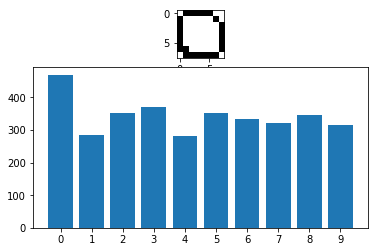

In [59]:
# Guessing the number
guessTheNumber('images/numbers/0.7.png')

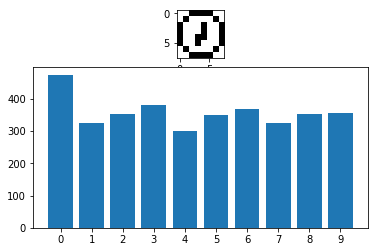

In [60]:
# Guessing the alphabet
guessTheAlphabet('images/alphabets/0.2.png')

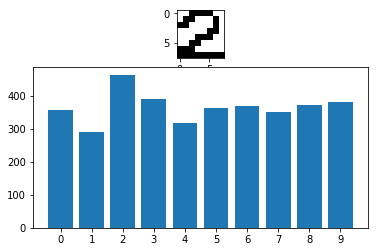

In [61]:
# Guessing the devnagri
guessTheAlphabet('images/devnagri/2.2.png')